In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import random
from sklearn.preprocessing import MinMaxScaler

In [38]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [39]:
print(f"The training sample:\n{train_data[0]}")
print(f"The training label:\n{train_labels[0]}")

The training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

In [40]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

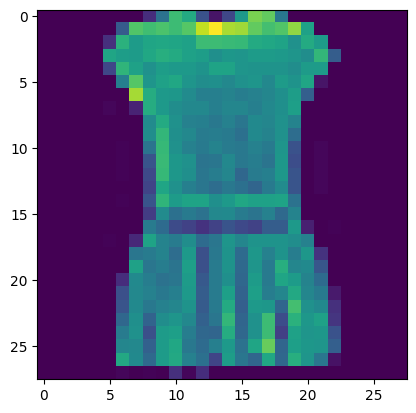

In [41]:
plt.imshow(train_data[3])

In [42]:
label_names=['Tshirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Snekar','Bag','Ankle Boot']
len(label_names)

10

Text(0.5, 1.0, 'Tshirt/Top')

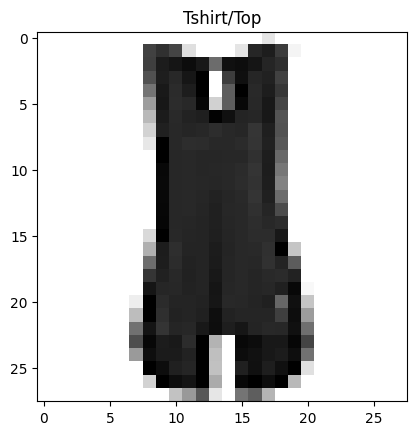

In [43]:
index=random.randint(0,11)
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(label_names[train_labels[index]])

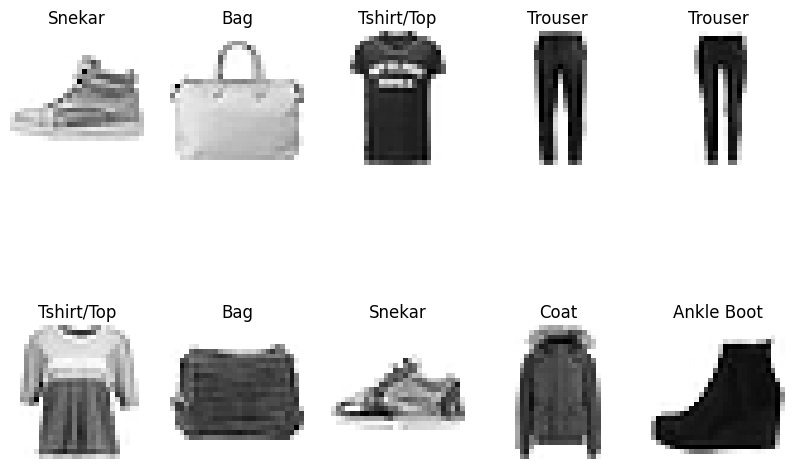

In [44]:
plt.figure(figsize=(10,7))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    index=random.choice(range(len(train_data)))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(label_names[train_labels[index]])
    plt.axis(False)

In [25]:
tf.random.set_seed(100)
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_1.add(tf.keras.layers.Dense(1000, activation='relu'))
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])
history_1=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 4.0887 - accuracy: 0.3504 - val_loss: 1.6463 - val_accuracy: 0.3435
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 1.3817 - accuracy: 0.4436 - val_loss: 1.4044 - val_accuracy: 0.3835
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 1.9060 - accuracy: 0.2711 - val_loss: 2.0595 - val_accuracy: 0.1851
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 2.0724 - accuracy: 0.1835 - val_loss: 2.0616 - val_accuracy: 0.1849
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.0738 - accuracy: 0.1828 - val_loss: 2.3037 - val_accuracy: 0.1926
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 2.0943 - accuracy: 0.1819 - val_loss: 2.1182 - val_accuracy: 0.1900
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 2.0537 - accuracy: 0.1878 - val_loss: 2.5437 -

In [49]:
scaler=MinMaxScaler()
train_samples,train_nx,train_ny=train_data.shape
test_samples,test_nx,test_ny=test_data.shape
train_data_norm=scaler.fit_transform(train_data.reshape(train_samples,train_nx*train_ny))
test_data_norm=scaler.transform(test_data.reshape(test_samples,test_nx*test_ny))
train_data_norm.min(),train_data_norm.max(),test_data_norm.min(),test_data_norm.max()

(0.0, 1.0, 0.0, 1.8319327731092436)

In [53]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1000, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))
model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=['accuracy'])
history_2=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5462 - accuracy: 0.8102 - val_loss: 0.5703 - val_accuracy: 0.8141
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4177 - accuracy: 0.8526 - val_loss: 0.4231 - val_accuracy: 0.8458
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4003 - accuracy: 0.8600 - val_loss: 0.4177 - val_accuracy: 0.8547
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3673 - accuracy: 0.8697 - val_loss: 0.4420 - val_accuracy: 0.8468
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3635 - accuracy: 0.8724 - val_loss: 0.3976 - val_accuracy: 0.8635
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3501 - accuracy: 0.8758 - val_loss: 0.4043 - val_accuracy: 0.8627
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3399 - accuracy: 0.8795 - val_loss: 0.4038 -

<AxesSubplot:title={'center':'Normalized Data Loss Curves'}>

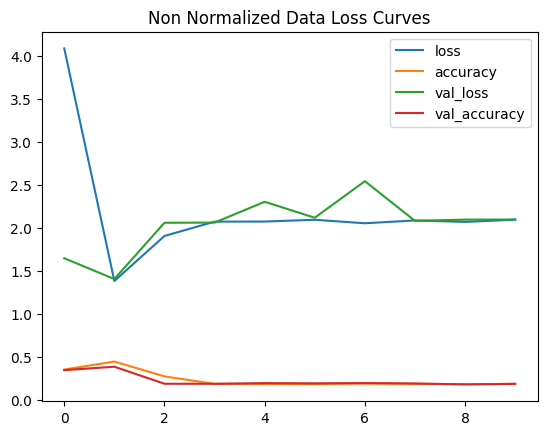

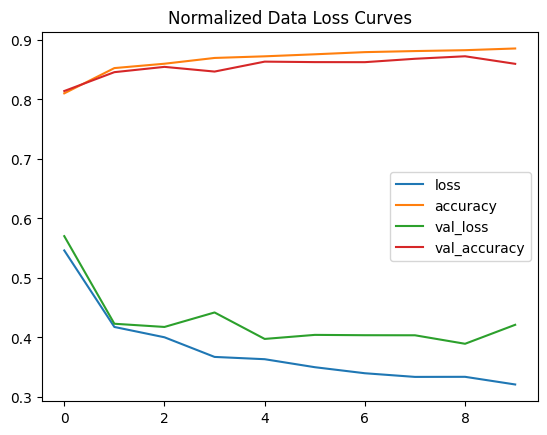

In [54]:
pd.DataFrame(history_1.history).plot(title='Non Normalized Data Loss Curves')
pd.DataFrame(history_2.history).plot(title='Normalized Data Loss Curves')